LAB SESSION 3 ; S NAVIN SUNDER ; BL.EN.U4CSE21176

In [126]:
import numpy as np
import pandas as pd
import statistics
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder  #used to convet labels to integers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor #as the given dataset iss continous and not discrete
from sklearn.metrics import classification_report   #for classification values
from sklearn.metrics import r2_score    #for continous values where regression is to be applied
from sklearn.neighbors import RadiusNeighborsRegressor  #Radius neighbour regressor is used for predicting "continuous target variables" based on the values of the nearest neighbors within a specified radius.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding):

In [66]:
data = pd.read_excel(r'C:\Amrita cse\5th Semester\Machine Learning\Project\embeddingsdata.xlsx')

df = pd.DataFrame(data)

df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.045697,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,-0.056834,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,-0.016249,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,-0.038879,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,-0.042079,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.040456,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,-0.026985,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,-0.041547,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,-0.057920,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415


• Calculate the mean for each class (also called as class centroid):

In [8]:
NumericColumns = df.select_dtypes(include=['number'])
Mean = NumericColumns.mean(axis = 0)
print("Mean of each class: ")
print(Mean)

Mean of each class: 
embed_0      0.008983
embed_1     -0.025840
embed_2      0.026057
embed_3      0.044410
embed_4      0.000759
               ...   
embed_763    0.037724
embed_764    0.020917
embed_765    0.012222
embed_766   -0.018116
embed_767   -0.020047
Length: 768, dtype: float64


• Calculate spread (standard deviation) for each class

In [9]:
StandardDeviation = NumericColumns.std()
print("Standard Deviation of each class: ")
print(StandardDeviation)

Standard Deviation of each class: 
embed_0      0.013080
embed_1      0.014345
embed_2      0.012180
embed_3      0.012642
embed_4      0.012814
               ...   
embed_763    0.010076
embed_764    0.010277
embed_765    0.011059
embed_766    0.011709
embed_767    0.010896
Length: 768, dtype: float64


•Calculate the distance between mean vectors between classes

In [6]:
SelectAttribute1 = data['embed_100']    #selecting a class with attribute name as embed_100
SelectAttribute2 = data['embed_101']    #selecting a class with attribute name as embed_101

Centroid1 = SelectAttribute1.mean()     #calculating the mean of the selected attribute
Centroid2 = SelectAttribute2.mean()

print(Centroid1)
print(Centroid2)

ReqDist = Centroid1 - Centroid2     #to calculate the mean distances by finding the difference between the 2 centroids
print("The distance between mean vectors between classes: ",ReqDist)


-0.037839825529663355
-0.03292605200497847
The distance between mean vectors between classes:  -0.004913773524684882


A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data.

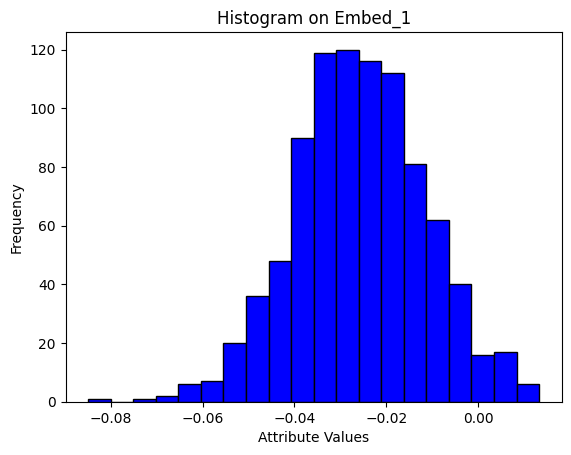

The mean of embed_1:  -0.025840109987570435
The variance of embed_1:  0.0002057731272218819


In [6]:
SelectedAttribute = data['embed_1']
#plotting the histogram using matplot library
plt.hist(SelectedAttribute,bins=20,color='blue',edgecolor='black')
plt.xlabel('Attribute Values')
plt.ylabel('Frequency')
plt.title('Histogram on Embed_1')
plt.show()
#calculating the mean of embed_1
meanEmbed = SelectedAttribute.mean()
print("The mean of embed_1: ",meanEmbed)
#calculating the variance of embed_1
varianceEmbed = SelectedAttribute.var()
print("The variance of embed_1: ",varianceEmbed)

A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. Make a plot of the distance and observe the nature of this graph.

Minkowski Distance for r = 1: 31.96499964603072
Minkowski Distance for r = 2: 1.182127241672094
Minkowski Distance for r = 3: 0.40941665963945145
Minkowski Distance for r = 4: 0.24620977514382517
Minkowski Distance for r = 5: 0.1840471219197787
Minkowski Distance for r = 6: 0.15312586766036157
Minkowski Distance for r = 7: 0.13529135492947555
Minkowski Distance for r = 8: 0.12401759384110374
Minkowski Distance for r = 9: 0.11644405268567906
Minkowski Distance for r = 10: 0.11113566528516694


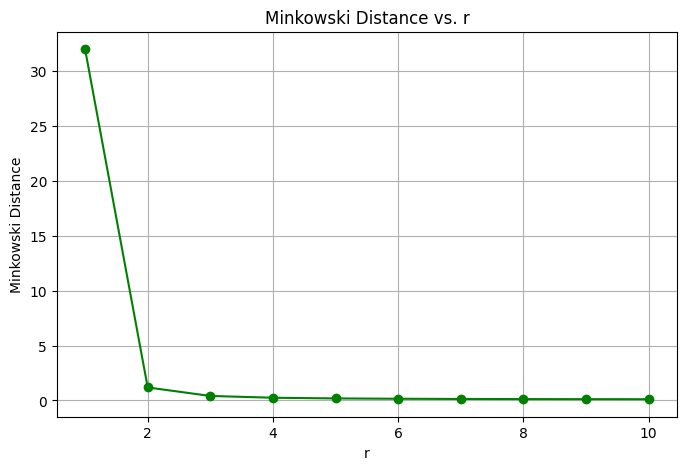

In [10]:
vector1 = data['embed_0'].to_numpy()
vector2 = data['embed_1'].to_numpy()

rValues = range(1,11)
RequiredDistances = []

for r in rValues:
    dist = np.power(np.sum(np.abs(vector1 - vector2) ** r),1.0 / r)
    print("Minkowski Distance for r = " + str(r) + ": " + str(dist))
    RequiredDistances.append(dist)

plt.figure(figsize=(8, 5))
plt.plot(rValues, RequiredDistances, marker='o', linestyle='-', color='green')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

A4. Divide dataset in your project into two parts –train & test set. To accomplish this, use the train-test_split() function available in SciKit.

In [67]:
#initializing the data into an array using the numpy library
data = np.array(data)
# Assuming your dataset is stored in a variable called 'data'
# Splitting the dataset into features (X) and labels (y)
X = data[:, :-1]  # Assuming the last column is the target variable
y = data[:, -1]   # Assuming the last column is the target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A5. Train a kNN classifier (k =3)using the training set obtained from above exercise.

In [68]:
knn = KNeighborsRegressor(n_neighbors=3)            #using regression here as the y_train values are continous and not discrete

# Training the regressor
knn.fit(X_train, y_train)               

KNeighborsRegressor(n_neighbors=3)

A6. Test the accuracy of the kNNusing the test set obtained from above exercise.

In [69]:
## Calculate the accuracy of the kNN classifier on the test set
accuracy = knn.score(X_test, y_test)    #score(): method to return the mean accuracy on the given dataset and labels. The accuracy value will be between 0 and 1, where 1 represents a perfect prediction.
#                                        #score() method provided by scikit-learn
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.24073743676147763


A7.Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [70]:
# Make predictions on the test vectors
predictions = knn.predict(X_test)

# Print the predicted class labels for the test vectors
print("Predicted labels:")      #predict() function of the kNN classifier to study the prediction behavior for test vectors. The predict() function takes the test vectors as input and returns the predicted class labels
print(predictions)

#output obtained from the code will be the predicted class labels for the test vectors. Each element in the output array corresponds to the predicted class label for the corresponding test vector.
#The predicted class labels can provide insights into how the kNN classifier is categorizing or classifying the test vectors based on the patterns it learned during training. You can compare these predicted labels with the true labels (test_labels) to evaluate the accuracy or other performance metrics of the classifier.
#Here train_data, test_data, train_labels, test_labels <=> X_train, X_test, y_train, y_test 

Predicted labels:
[-0.02083319 -0.02055517 -0.02692434 -0.03663652 -0.02665348 -0.02630889
 -0.03127179 -0.01004201 -0.01080981 -0.01224249 -0.0180552  -0.01980415
 -0.02773031 -0.01622231 -0.03794583 -0.0375789  -0.01918284 -0.02391689
 -0.01400778 -0.01325827 -0.02686621 -0.02127205 -0.0201616  -0.02370403
 -0.03240223 -0.00565731 -0.01337921 -0.01231107 -0.02498185 -0.01835036
 -0.02822533 -0.02101326 -0.02598897 -0.02598968 -0.02212124 -0.02289729
 -0.01672267 -0.01178713 -0.0357108  -0.02996049 -0.00518574 -0.0324085
 -0.03476314 -0.01670494 -0.01515334 -0.0153668  -0.02318467 -0.02329467
 -0.02458811 -0.00999943 -0.02055735 -0.01124649 -0.02062439 -0.02391827
 -0.02446232 -0.01981818 -0.01817206 -0.0212317  -0.02425308 -0.02189546
 -0.00634815 -0.01925654 -0.02527598 -0.01221924 -0.02167488 -0.02978044
 -0.00989201 -0.02836932 -0.02984229 -0.01280012 -0.01885084 -0.00579298
 -0.01237001 -0.03677778 -0.0227156  -0.03034946 -0.0168973  -0.02402442
 -0.01597065 -0.01436569 -0.025159

A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

In [8]:
knn = KNeighborsRegressor(n_neighbors=1)            #using regression here as the y_train values are continous and not discrete

# Training the regressor
knn.fit(X_train, y_train)   

KNeighborsRegressor(n_neighbors=1)

A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

In [105]:
#the comparisons of two KNN values is always made after the predicting the values for the given value of K. Mean square error and R-squared error is used to perform the comparisons
# Mean Squared Error: Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the true values of the target variable.
#R- Squared Error: A statistical indicator frequently used to assess the regression model's quality of fit. It reveals how effectively the model accounts for the variance in the dependent variable 

# Train the NN classifier with k=1
nn = KNeighborsRegressor(n_neighbors=1)
nn.fit(X_train, y_train)

# Train the kNN classifier with k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
nn_predictions = nn.predict(X_test)
knn_predictions = knn.predict(X_test)

# Calculate the mean squared error (MSE)
nn_mse = mean_squared_error(y_test, nn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Calculate the R-squared score
nn_r2 = r2_score(y_test, nn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print the results
print("Results for NN (k=1):")
print("MSE:", nn_mse)
print("R-squared score:", nn_r2)

print("\nResults for kNN (k=3):")
print("MSE:", knn_mse)
print("R-squared score:", knn_r2)


Results for NN (k=1):
MSE: 0.00012546454023971257
R-squared score: -0.23194785411400365

Results for kNN (k=3):
MSE: 7.732513036150924e-05
R-squared score: 0.24073743676147763


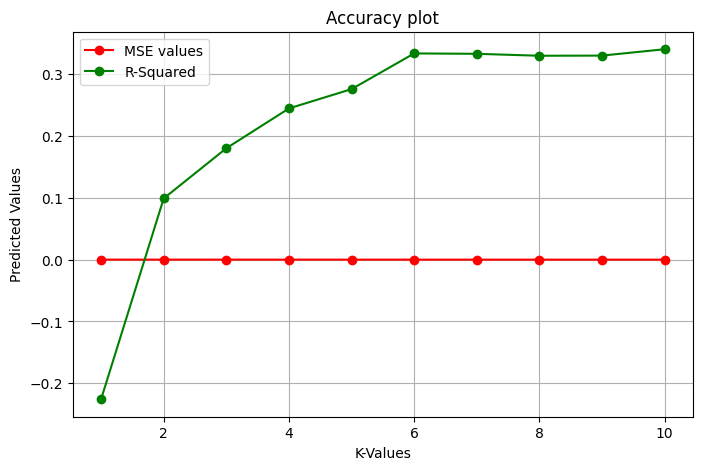

In [12]:
predictions1 = []
predictions2 = []


for k in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)       #fit() => to train the regressor
    knn_predictions = knn.predict(X_test)   #predict() => to make predictions on the test set
    knn_mse = mean_squared_error(y_test, knn_predictions)   #MSE used as the given dataset is continous and not discrete
    knn_r2 = r2_score(y_test, knn_predictions)
    predictions1.append(knn_mse)
    predictions2.append(knn_r2)

plt.figure(figsize=(8, 5))
plt.plot(range(1,11), predictions1,marker='o', linestyle='-', color='red' ,label='MSE values')  #accuracy generated based on MSE values
plt.plot(range(1,11), predictions2,marker='o', linestyle='-', color='green',label='R-Squared')    #accuracy generated based on r2 values
plt.xlabel('K-Values')
plt.ylabel('Predicted Values')
plt.title('Accuracy plot')
plt.grid(True)
plt.legend()
plt.show()

A9. Please evaluate confusion matrix for your classification problem.

In [89]:
data1 = pd.read_excel(r"C:\Users\navin\Downloads\embeddingsdata.xlsx")
df = pd.DataFrame(data1)

df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [120]:
#initializing the data into an array using the numpy library
data = np.array(data1)
threshold = 5  
y_binary = np.where(y > threshold, 1, 0)
# Assuming your dataset is stored in a variable called 'data'
# Splitting the dataset into features (X) and labels (y)
X = data[:, :-1]  # Assuming the last column is the target variable
y = data[:, -1]   # Assuming the last column is the target variable
# Splitting the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)    #making the regressor to accept all 768 columns
knn.fit(X1_train, y1_train)
y_prediction = knn.predict(X1_test)
absolute = abs(y_prediction)
threshold = 0.02
# Convert continuous values to discrete values
discrete_values = [1 if value >= threshold else 0 for value in absolute]
cn = confusion_matrix(y1_test,discrete_values)
print(cn)


[[203  34]
 [ 12  21]]


In [121]:
from sklearn.metrics import classification_report

report = classification_report(y1_test, discrete_values)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       237
           1       0.38      0.64      0.48        33

    accuracy                           0.83       270
   macro avg       0.66      0.75      0.69       270
weighted avg       0.88      0.83      0.85       270

